In [1]:
import os
import glob
import pandas as pd
os.chdir("C:\\Users\\evany_cdhq038\\OneDrive\\Desktop\\FinishedExcelEikon")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
print(all_filenames)
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

#export to csv
combined_csv.to_csv( "allEikonExcelAggregated.csv", index=False, encoding='utf-8-sig')

['12_15_AggregationUpTo2019.csv', 'Aggregation2020.csv', 'Aggregation2021.csv', 'Aggregation2022.csv']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('allEikonExcelAggregated.csv')
df.count()
# number of (total reports, downloaded reports, unique cusip6) by year.
yearlist = [str(date)[:4] for date in df["PDFName"]]
print(yearlist)
df["Year"]=yearlist

def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
#creating bar graph of total reports per year
yearList=df["Year"].unique()
yearList=sorted(yearList)
totalReports=[]

for year in yearList:
    print(year)
    counter=0
    for ind in df.index:
        if df["Year"][ind]==year:
            counter+=1
    totalReports.append(counter)

#print(totalReports)

NameError: name 'df' is not defined

In [1]:
plt.bar(yearList,totalReports)
plt.title('Number of Total Reports per Year')
plt.xlabel('Year')
plt.ylabel('Number of Total Reports')
add_value_label(yearList,totalReports)
plt.show()

In [5]:
#creating a graph of downloaded reports by year
yearList=df["Year"].unique()
yearList=sorted(yearList)
totalDownloadedReports=[]

for year in yearList:
    print(year)
    counter=0
    for ind in df.index:
        if df["isDownloaded"][ind]==1 and df["Year"][ind]==year:
            counter+=1
    totalDownloadedReports.append(counter)

print(totalDownloadedReports)

2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
nan
[146296, 149007, 167964, 172259, 182190, 159770, 151998, 136362, 123473, 104463, 75058, 0]


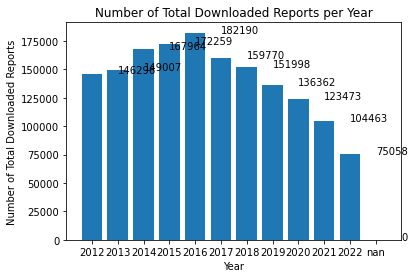

In [6]:
plt.bar(yearList,totalDownloadedReports)
plt.title('Number of Total Downloaded Reports per Year')
plt.xlabel('Year')
plt.ylabel('Number of Total Downloaded Reports')
add_value_label(yearList,totalDownloadedReports)
plt.show()

In [7]:
#creating unique cusip6 by year

yearList=df["Year"].unique()
yearList=sorted(yearList)
uniqueCusip6s=[]

for year in yearList:
    print(year)
    thisYearCusip=[]
    for ind in df.index:
        if df["Year"][ind]==year:
            thisYearCusip.append(df["cusip6"][ind])
    uniqueCusip6s.append(thisYearCusip)

print(uniqueCusip6s)

2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
nan


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[2272, 2140, 2303, 2300, 2349, 2238, 2184, 2114, 2011, 1982, 1747, 451]


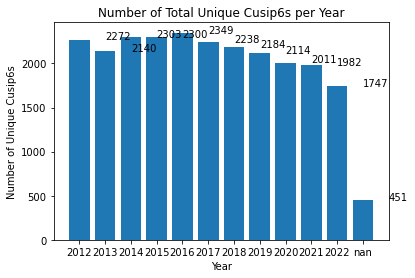

In [8]:
#counting unique values
finalCusip=[]
for cusipList in uniqueCusip6s:#converting to a set (which only contains unique values) and counting length
    tempSet=set(cusipList)
    finalCusip.append(len(tempSet))

print(finalCusip)

plt.bar(yearList,finalCusip)
plt.title('Number of Total Unique Cusip6s per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Cusip6s')
add_value_label(yearList,finalCusip)
plt.show()
    
    

In [9]:
df.count()

Available                1623907
Date                     1473823
Prim. Ticker             1367152
Second. Ticker            448371
Title                    1623907
Pages                    1623907
Contributor              1623907
RI                        501943
Price                    1317270
Doc Grp                  1623907
Info                     1623907
Analyst                  1356276
Estimate Rating           753475
Recommendation Rating     763319
Company Name             1540222
Country/Region           1540224
Industry                 1622957
Relevance                      0
DCN                      1623907
ExcelPath                1623907
cusip6                   1623907
Ticker                   1620660
PDFName                  1568840
PDFPath                  1568840
isDownloaded             1623907
DatePDFName              1568840
Year                     1623907
dtype: int64

In [10]:
#testing below
df.head()


,Available,Date,Prim. Ticker,Second. Ticker,Title,Pages,Contributor,RI,Price,Doc Grp,...,Relevance,DCN,ExcelPath,cusip6,Ticker,PDFName,PDFPath,isDownloaded,DatePDFName,Year
0,2016-11-24 00:00:00,2016-11-17 00:00:00,TEAM.OQ,NaN,Atlassian Corporation Plc:Positive Takeaways F...,5,William Blair & Company,NaN,34.5,Inv.,...,NaN,76463545,C:\Users\WillKnight\Desktop\BetaTest\000165_AM...,000165,AMFD,2016-11-17-TEAM.OQ-William Blair Comp-Atlassi...,.\000165_AMFD\16\11\2016-11-17-TEAM.OQ-William...,1,2016-11-17,2016
1,2016-11-22 00:00:00,2016-11-15 00:00:00,"TEAM.OQ, ASH.N, CHS.N, NTNX.OQ, THS.N","ASH.N, CHS.N, NTNX.OQ, THS.N","KBCM: CHS (-Downgrade), JWN/GPS/QVCA (+), THS ...",10,KeyBanc Capital Markets Inc.,Ini,103.5,Inv.,...,NaN,76439187,C:\Users\WillKnight\Desktop\BetaTest\000165_AM...,000165,AMFD,2016-11-15-TEAM.OQ-KeyBanc Capital Mark-KBCM C...,.\000165_AMFD\16\11\2016-11-15-TEAM.OQ-KeyBanc...,1,2016-11-15,2016
2,2016-11-11 00:00:00,2016-10-28 00:00:00,TEAM.OQ,NaN,Atlassian Corporation PLC - Some Moving Parts ...,7,BTIG,Estimate Increase,34.5,Inv.,...,NaN,76200137,C:\Users\WillKnight\Desktop\BetaTest\000165_AM...,000165,AMFD,2016-10-28-TEAM.OQ-BTIG-Atlassian Corporation ...,.\000165_AMFD\16\10\2016-10-28-TEAM.OQ-BTIG-At...,1,2016-10-28,2016
3,2016-11-04 00:00:00,2016-10-28 00:00:00,TEAM.OQ,NaN,Atlassian Corporation PLC: 1Q17 Results: Is Gu...,15,Morgan Stanley,NaN,220.0,Inv.,...,NaN,76193440,C:\Users\WillKnight\Desktop\BetaTest\000165_AM...,000165,AMFD,2016-10-28-TEAM.OQ-Morgan Stanley-Atlassian Co...,.\000165_AMFD\16\10\2016-10-28-TEAM.OQ-Morgan ...,1,2016-10-28,2016
4,2016-11-03 00:00:00,2016-10-27 00:00:00,TEAM.OQ,AMZN.OQ,Atlassian: TEAM: BUY: Beautiful Norm,15,Jefferies,Ini,115.0,Inv.,...,NaN,76191978,C:\Users\WillKnight\Desktop\BetaTest\000165_AM...,000165,AMFD,2016-10-27-TEAM.OQ-Jefferies-Atlassian TEAM BU...,.\000165_AMFD\16\10\2016-10-27-TEAM.OQ-Jefferi...,1,2016-10-27,2016


In [13]:
print(sorted(yearList))

['2012', '2013', '2014', '2015', '2016', '2020', '2021', '2022', 'nan']


In [15]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])

In [38]:
df.head()

,Available,Date,Doc Grp,Info,Prim. Ticker,Second. Ticker,RI,Title,Pages,Company Name,...,DCN,ExcelPath,cusip6,Ticker,PDFName,PDFPath,isDownloaded,Analyst,Recommendation Rating,Year
0,2021-06-10 00:00:00,2015-12-21 00:00:00,Inv.,pdf,AAON.OQ,"APOG.OQ, AYI.N, AZZ.N, BGC.N^F18, CMC.N, CNR.N...",NaN,Construction Product Industry Update: Commodit...,12,Aaon Inc,...,72826288,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-12-21-AAON.OQ-D.A. Davidson Comp-Constru...,.\000360_AAON\15\12\2015-12-21-AAON.OQ-D.A. Da...,1,NaN,NaN,2015
1,2021-06-10 00:00:00,2015-12-14 00:00:00,Inv.,pdf,AAON.OQ,"APOG.OQ, AYI.N, AZZ.N, BGC.N^F18, CMC.N, CNR.N...",NaN,Construction Product Industry Update: Industry...,13,Aaon Inc,...,72749963,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-12-14-AAON.OQ-D.A. Davidson Comp-Constru...,.\000360_AAON\15\12\2015-12-14-AAON.OQ-D.A. Da...,1,NaN,NaN,2015
2,2021-06-10 00:00:00,2015-11-03 00:00:00,Inv.,pdf,AAON.OQ,"AEGN.OQ^E21, APTS.N, BXP.N, CCOI.OQ, CFFN.OQ, ...",NaN,Morning Research Summary,13,Aaon Inc,...,72228540,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-11-03-AAON.OQ-D.A. Davidson Comp-Morning...,.\000360_AAON\15\11\2015-11-03-AAON.OQ-D.A. Da...,1,NaN,NaN,2015
3,2021-06-10 00:00:00,2015-11-02 00:00:00,Inv.,pdf,AAON.OQ,NaN,"Estimate Decrease, TargetPrice Decrease",AAON - EARNINGS - Slower Near-term Growth,7,Aaon Inc,...,72213880,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-11-02-AAON.OQ-D.A. Davidson Comp-AAON - ...,.\000360_AAON\15\11\2015-11-02-AAON.OQ-D.A. Da...,1,NaN,NaN,2015
4,2021-06-10 00:00:00,2015-09-08 00:00:00,Inv.,pdf,AAON.OQ,NaN,NaN,AAON: UPDATE: Expected Participation in Non-Re...,12,Aaon Inc,...,71575265,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-09-08-AAON.OQ-D.A. Davidson Comp-AAON UP...,.\000360_AAON\15\09\2015-09-08-AAON.OQ-D.A. Da...,1,NaN,NaN,2015


In [34]:
import time
yearlist = [str(date)[4:] for date in df["Date"]]
for item in yearlist:
    print(yearlist)
    time.sleep(5)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

In [26]:
yearList=[]
for date in df["Date"]:
    yearList.append(str(date)[:4])
    
df["Year"]=yearList


In [27]:
df.groupby("Year")

In [28]:
df

,Available,Date,Doc Grp,Info,Prim. Ticker,Second. Ticker,RI,Title,Pages,Company Name,...,DCN,ExcelPath,cusip6,Ticker,PDFName,PDFPath,isDownloaded,Analyst,Recommendation Rating,Year
0,2021-06-10 00:00:00,2015-12-21 00:00:00,Inv.,pdf,AAON.OQ,"APOG.OQ, AYI.N, AZZ.N, BGC.N^F18, CMC.N, CNR.N...",NaN,Construction Product Industry Update: Commodit...,12,Aaon Inc,...,72826288,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-12-21-AAON.OQ-D.A. Davidson Comp-Constru...,.\000360_AAON\15\12\2015-12-21-AAON.OQ-D.A. Da...,1,NaN,NaN,2015
1,2021-06-10 00:00:00,2015-12-14 00:00:00,Inv.,pdf,AAON.OQ,"APOG.OQ, AYI.N, AZZ.N, BGC.N^F18, CMC.N, CNR.N...",NaN,Construction Product Industry Update: Industry...,13,Aaon Inc,...,72749963,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-12-14-AAON.OQ-D.A. Davidson Comp-Constru...,.\000360_AAON\15\12\2015-12-14-AAON.OQ-D.A. Da...,1,NaN,NaN,2015
2,2021-06-10 00:00:00,2015-11-03 00:00:00,Inv.,pdf,AAON.OQ,"AEGN.OQ^E21, APTS.N, BXP.N, CCOI.OQ, CFFN.OQ, ...",NaN,Morning Research Summary,13,Aaon Inc,...,72228540,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-11-03-AAON.OQ-D.A. Davidson Comp-Morning...,.\000360_AAON\15\11\2015-11-03-AAON.OQ-D.A. Da...,1,NaN,NaN,2015
3,2021-06-10 00:00:00,2015-11-02 00:00:00,Inv.,pdf,AAON.OQ,NaN,"Estimate Decrease, TargetPrice Decrease",AAON - EARNINGS - Slower Near-term Growth,7,Aaon Inc,...,72213880,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-11-02-AAON.OQ-D.A. Davidson Comp-AAON - ...,.\000360_AAON\15\11\2015-11-02-AAON.OQ-D.A. Da...,1,NaN,NaN,2015
4,2021-06-10 00:00:00,2015-09-08 00:00:00,Inv.,pdf,AAON.OQ,NaN,NaN,AAON: UPDATE: Expected Participation in Non-Re...,12,Aaon Inc,...,71575265,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-09-08-AAON.OQ-D.A. Davidson Comp-AAON UP...,.\000360_AAON\15\09\2015-09-08-AAON.OQ-D.A. Da...,1,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694546,2016-10-26 00:00:00,2016-10-19 00:00:00,Inv.,pdf,RCL.N,NaN,Estimate Decrease,Royal Caribbean Cruises Ltd.:Lowering Estimate...,5,Royal Caribbean Cruises Ltd,...,76084512,C:\Users\WillKnight\Desktop\BetaTest\V7780T_RC...,V7780T,RCL,2016-10-19-RCL.N-William Blair Comp-Royal Car...,.\V7780T_RCL\16\10\2016-10-19-RCL.N-William Bl...,1,NaN,NaN,2016
694547,2016-10-26 00:00:00,2016-10-19 00:00:00,Inv.,pdf,"RCL.N, NCLH.N","CCL.N, RCL.N",NaN,Sept. Cruise Pricing Survey: Broad Based Slowd...,37,Norwegian Cruise Line Holdings Ltd,...,76079740,C:\Users\WillKnight\Desktop\BetaTest\V7780T_RC...,V7780T,RCL,2016-10-19-RCL.N-Truist Securities-Sept. Cruis...,.\V7780T_RCL\16\10\2016-10-19-RCL.N-Truist Sec...,1,NaN,NaN,2016
694548,2016-10-22 00:00:00,2016-10-19 00:00:00,Inv.,pdf,RCL.N,"CCL.N, NCLH.N",NaN,U.S. Leisure: Cruise: Takeaways from China,20,Royal Caribbean Cruises Ltd,...,76076656,C:\Users\WillKnight\Desktop\BetaTest\V7780T_RC...,V7780T,RCL,2016-10-19-RCL.N-Barclays-U.S. Leisure Cruise ...,.\V7780T_RCL\16\10\2016-10-19-RCL.N-Barclays-U...,1,NaN,NaN,2016
694549,2016-10-21 00:00:00,2016-10-14 00:00:00,Inv.,pdf,RCL.N,"CCL.N, NCLH.N, RCL.N",Estimate Decrease,Cruise Lines: Lowering Estimates and Price Tar...,17,Royal Caribbean Cruises Ltd,...,76036210,C:\Users\WillKnight\Desktop\BetaTest\V7780T_RC...,V7780T,RCL,2016-10-14-RCL.N-Wedbush Securities I-Cruise L...,.\V7780T_RCL\16\10\2016-10-14-RCL.N-Wedbush Se...,1,NaN,NaN,2016


In [ ]:
#testing below

In [18]:
df.groupby("Date")["cusip6"].count()
df.head()

,Available,Date,Doc Grp,Info,Prim. Ticker,Second. Ticker,RI,Title,Pages,Company Name,...,Relevance,DCN,ExcelPath,cusip6,Ticker,PDFName,PDFPath,isDownloaded,Analyst,Recommendation Rating
0,2021-06-10 00:00:00,2015-12-21 00:00:00,Inv.,pdf,AAON.OQ,"APOG.OQ, AYI.N, AZZ.N, BGC.N^F18, CMC.N, CNR.N...",NaN,Construction Product Industry Update: Commodit...,12,Aaon Inc,...,NaN,72826288,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-12-21-AAON.OQ-D.A. Davidson Comp-Constru...,.\000360_AAON\15\12\2015-12-21-AAON.OQ-D.A. Da...,1,NaN,NaN
1,2021-06-10 00:00:00,2015-12-14 00:00:00,Inv.,pdf,AAON.OQ,"APOG.OQ, AYI.N, AZZ.N, BGC.N^F18, CMC.N, CNR.N...",NaN,Construction Product Industry Update: Industry...,13,Aaon Inc,...,NaN,72749963,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-12-14-AAON.OQ-D.A. Davidson Comp-Constru...,.\000360_AAON\15\12\2015-12-14-AAON.OQ-D.A. Da...,1,NaN,NaN
2,2021-06-10 00:00:00,2015-11-03 00:00:00,Inv.,pdf,AAON.OQ,"AEGN.OQ^E21, APTS.N, BXP.N, CCOI.OQ, CFFN.OQ, ...",NaN,Morning Research Summary,13,Aaon Inc,...,NaN,72228540,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-11-03-AAON.OQ-D.A. Davidson Comp-Morning...,.\000360_AAON\15\11\2015-11-03-AAON.OQ-D.A. Da...,1,NaN,NaN
3,2021-06-10 00:00:00,2015-11-02 00:00:00,Inv.,pdf,AAON.OQ,NaN,"Estimate Decrease, TargetPrice Decrease",AAON - EARNINGS - Slower Near-term Growth,7,Aaon Inc,...,NaN,72213880,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-11-02-AAON.OQ-D.A. Davidson Comp-AAON - ...,.\000360_AAON\15\11\2015-11-02-AAON.OQ-D.A. Da...,1,NaN,NaN
4,2021-06-10 00:00:00,2015-09-08 00:00:00,Inv.,pdf,AAON.OQ,NaN,NaN,AAON: UPDATE: Expected Participation in Non-Re...,12,Aaon Inc,...,NaN,71575265,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-09-08-AAON.OQ-D.A. Davidson Comp-AAON UP...,.\000360_AAON\15\09\2015-09-08-AAON.OQ-D.A. Da...,1,NaN,NaN


In [15]:
df.groupby(df['Date'].map(lambda x: x[:4]))

TypeError: 'float' object is not subscriptable

In [14]:
df.groupby(df['Date'].map(lambda x: x.year))

AttributeError: 'str' object has no attribute 'year'

In [5]:
df.groupby(df.Date.dt.year)

AttributeError: Can only use .dt accessor with datetimelike values

In [3]:
# number of (total reports, downloaded reports, unique cusip6) by year.
df.head()

,Available,Date,Doc Grp,Info,Prim. Ticker,Second. Ticker,RI,Title,Pages,Company Name,...,Relevance,DCN,ExcelPath,cusip6,Ticker,PDFName,PDFPath,isDownloaded,Analyst,Recommendation Rating
0,2021-06-10 00:00:00,2015-12-21 00:00:00,Inv.,pdf,AAON.OQ,"APOG.OQ, AYI.N, AZZ.N, BGC.N^F18, CMC.N, CNR.N...",NaN,Construction Product Industry Update: Commodit...,12,Aaon Inc,...,NaN,72826288,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-12-21-AAON.OQ-D.A. Davidson Comp-Constru...,.\000360_AAON\15\12\2015-12-21-AAON.OQ-D.A. Da...,1,NaN,NaN
1,2021-06-10 00:00:00,2015-12-14 00:00:00,Inv.,pdf,AAON.OQ,"APOG.OQ, AYI.N, AZZ.N, BGC.N^F18, CMC.N, CNR.N...",NaN,Construction Product Industry Update: Industry...,13,Aaon Inc,...,NaN,72749963,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-12-14-AAON.OQ-D.A. Davidson Comp-Constru...,.\000360_AAON\15\12\2015-12-14-AAON.OQ-D.A. Da...,1,NaN,NaN
2,2021-06-10 00:00:00,2015-11-03 00:00:00,Inv.,pdf,AAON.OQ,"AEGN.OQ^E21, APTS.N, BXP.N, CCOI.OQ, CFFN.OQ, ...",NaN,Morning Research Summary,13,Aaon Inc,...,NaN,72228540,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-11-03-AAON.OQ-D.A. Davidson Comp-Morning...,.\000360_AAON\15\11\2015-11-03-AAON.OQ-D.A. Da...,1,NaN,NaN
3,2021-06-10 00:00:00,2015-11-02 00:00:00,Inv.,pdf,AAON.OQ,NaN,"Estimate Decrease, TargetPrice Decrease",AAON - EARNINGS - Slower Near-term Growth,7,Aaon Inc,...,NaN,72213880,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-11-02-AAON.OQ-D.A. Davidson Comp-AAON - ...,.\000360_AAON\15\11\2015-11-02-AAON.OQ-D.A. Da...,1,NaN,NaN
4,2021-06-10 00:00:00,2015-09-08 00:00:00,Inv.,pdf,AAON.OQ,NaN,NaN,AAON: UPDATE: Expected Participation in Non-Re...,12,Aaon Inc,...,NaN,71575265,C:\Users\WillKnight\Desktop\BetaTest\000360_AA...,000360,AAON,2015-09-08-AAON.OQ-D.A. Davidson Comp-AAON UP...,.\000360_AAON\15\09\2015-09-08-AAON.OQ-D.A. Da...,1,NaN,NaN


In [2]:
df.count()

Available                694551
Date                     621680
Doc Grp                  694551
Info                     694551
Prim. Ticker             593656
Second. Ticker           213395
RI                       215326
Title                    694551
Pages                    694551
Company Name             649020
Contributor              694551
Price                    542758
Estimate Rating          277821
Country/Region           649021
Industry                 693925
Relevance                     0
DCN                      694551
ExcelPath                694551
cusip6                   694551
Ticker                   692221
PDFName                  666042
PDFPath                  666042
isDownloaded             694551
Analyst                  589907
Recommendation Rating    284643
dtype: int64